In [42]:
import subprocess

subprocess.run(['python', '-m', 'GenerateStats.gen_stats'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', '-m', 'GenerateStats.gen_stats'], returncode=0)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

df_learning = pd.read_csv("stats_with_learning.csv")
print(df_learning)

df = pd.read_csv("stats_without_learning.csv")
print(df)

     time  costs  serv_times   runtimes
0       0     80           0   1.925548
1       1    120           0   1.925677
2       2    160           0   1.925821
3       3    200           0   1.925946
4       4    240           0   1.926081
..    ...    ...         ...        ...
496   496  19920          48  24.286483
497   497  19960          48  24.290761
498   498  20000          48  24.338648
499   499  20040          48  24.380060
500   500  20080          79  24.418096

[501 rows x 4 columns]
     time  costs  serv_times   runtimes
0       0     80           0   1.588704
1       1    120           0   1.588815
2       2    160           0   1.588923
3       3    200           0   1.589028
4       4    240           0   1.589133
..    ...    ...         ...        ...
469   469  18840          39  27.213503
470   470  18880          39  27.266207
471   471  18920          50  27.339059
472   472  18960          50  27.411580
473   473  19000          44  27.491320

[474 rows x 4 c

Fixed cost: 19000 Learning cost: 20080


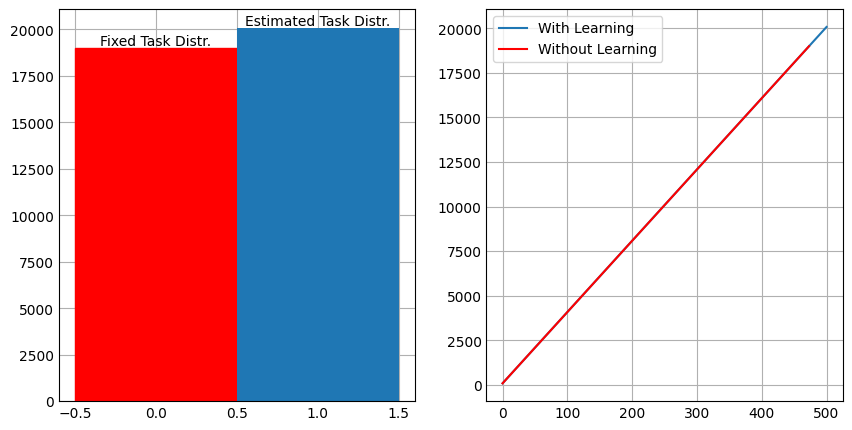

In [52]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

print("Fixed cost: " + str(cost) + " Learning cost: " + str(cost_learning))
plt.style.use('_mpl-gallery')
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Learning")
ax[1].plot(df["time"], df["costs"], label="Without Learning", color="r")

ax[1].legend()

plt.show()

Fixed makespan: 474 Learning makespan: 501


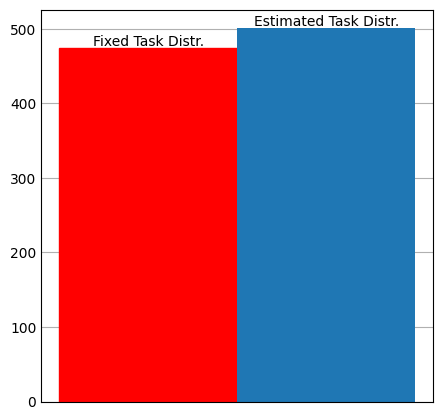

In [45]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

print("Fixed makespan: " + str(makespan) + " Learning makespan: " + str(makespan_learning))

plt.figure(figsize=(4, 4))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.xticks([])

plt.show()

Fixed runtime: 474 Learning runtime: 501


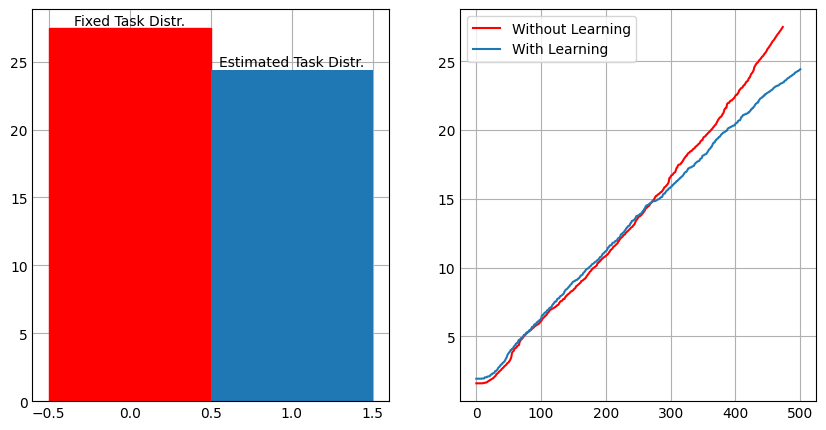

In [53]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

print("Fixed runtime: " + str(makespan) + " Learning runtime: " + str(makespan_learning))

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')

ax[1].plot(df["time"], df["runtimes"], label="Without Learning", color="r")
ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Learning")

ax[1].legend()

plt.show()

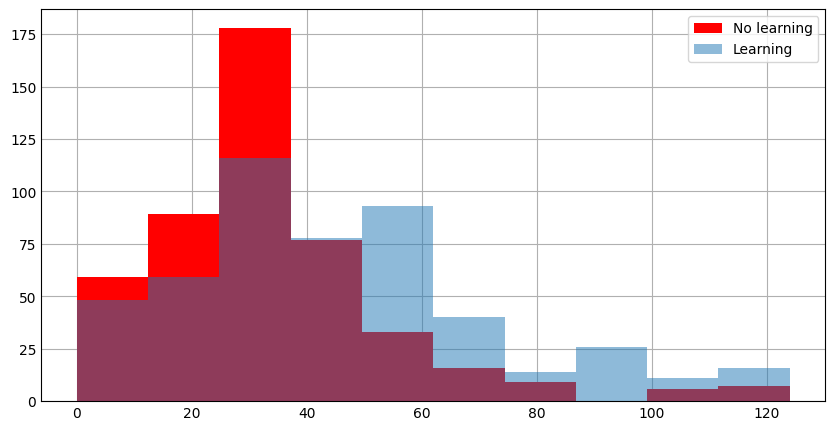

In [67]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))


ax.hist(df["serv_times"], label="No learning", color="r")
ax.hist(df_learning["serv_times"], alpha=0.5, label="Learning")

ax.legend()

plt.show()